In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import *
from sklearn.cluster import *
import matplotlib.pyplot as plt
from sklearn.mixture import *

In [2]:
data = pd.read_csv("/Users/dariashavronskaia/Desktop/data science/data/snsdata.csv")

In [3]:
data.head()

gradyear gender     age  friends  basketball  football  soccer  softball  \
0      2006      M  18.982        7           0         0       0         0   
1      2006      F  18.801        0           0         1       0         0   
2      2006      M  18.335       69           0         1       0         0   
3      2006      F  18.875        0           0         0       0         0   
4      2006    NaN  18.995       10           0         0       0         0   

   volleyball  swimming  ...  blonde  mall  shopping  clothes  hollister  \
0           0         0  ...       0     0         0        0          0   
1           0         0  ...       0     1         0        0          0   
2           0         0  ...       0     0         0        0          0   
3           0         0  ...       0     0         0        0          0   
4           0         0  ...       0     0         2        0          0   

   abercrombie  die  death  drunk  drugs  
0            0    0      0      0      0  
1            0    0      0      0      0  
2            0    0      1      0      0  
3            0    0      0      0      0  
4            0    0      0      1      1  

[5 rows x 40 columns]

In [5]:
data.drop(['gradyear', 'gender', 'age', 'friends'], axis = 1, inplace=True)

In [6]:
data.shape

(30000, 36)

In [8]:
X = data.values

In [10]:
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

In [11]:
X_norm[0][0]

-0.3322172643985876

In [14]:
kmean = KMeans(n_clusters=9, random_state=42)
kmean.fit(X_norm)
kmean.inertia_


/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


857169.1033997787

In [17]:
data.loc[:, 'label'] = kmean.labels_
data.label.value_counts()

label
0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: count, dtype: int64

/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

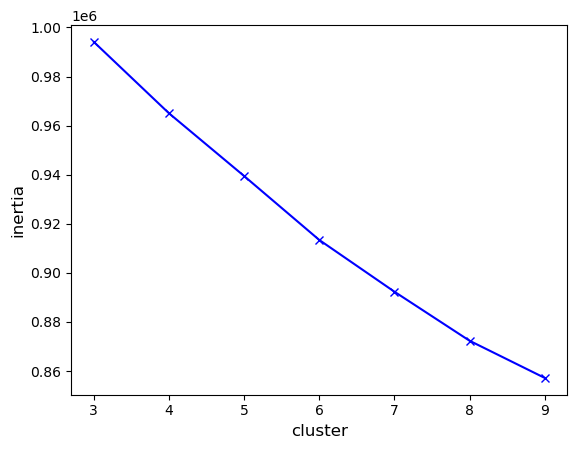

In [20]:
def get_inertia(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia
 
inertia = []
for cluster_num in range(3, 10):
    inertia.append(get_inertia(cluster_num, X_norm))
 
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(3, 10)], inertia, 'xb-')

/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

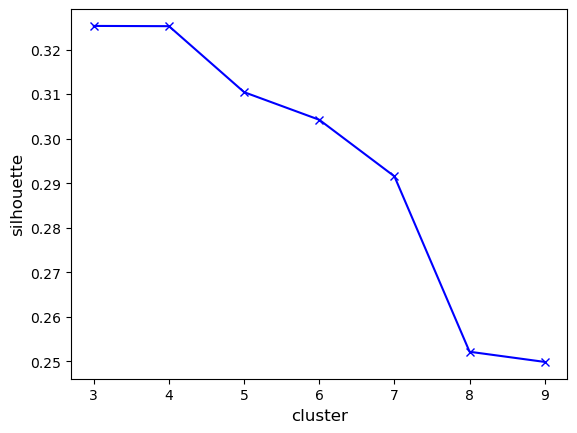

In [21]:
from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(3, 10):
    silhouettes.append(get_silhouette(i, X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 10)], silhouettes, 'xb-')

In [22]:
kmean = KMeans(n_clusters=3, random_state=42)
kmean.fit(X_norm)
kmean.inertia_

/Users/dariashavronskaia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


994116.3386407996

In [23]:
data.loc[:, 'label'] = kmean.labels_
data.label.value_counts()

label
2    22932
0     5938
1     1130
Name: count, dtype: int64

In [24]:
top_list = []
for label, group in data.groupby('label'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    top_5 = set(means.head(10).index)
    top_list.append(top_5)

set.intersection(*top_list)

{'dance', 'god', 'hair', 'music'}

In [26]:
gm = GaussianMixture(n_components=3, random_state=42)
pred = gm.fit_predict(X_norm)

In [29]:
np.unique(pred, return_counts = True)

(array([0, 1, 2]), array([23426,  6573,     1]))

In [42]:
teen = np.where(pred == 2)
data.iloc[teen].value_counts()

basketball  football  soccer  softball  volleyball  swimming  cheerleading  baseball  tennis  sports  cute  sex  sexy  hot  kissed  dance  band  marching  music  rock  god  church  jesus  bible  hair  dress  blonde  mall  shopping  clothes  hollister  abercrombie  die  death  drunk  drugs  label
0           2         0       0         0           1         0             0         0       0       1     22   1     0    0       1      1     0         0      1     10   0       1      0      12    2      327     0     0         1        0          0            6    6      6      0      1        1
Name: count, dtype: int64